In [1]:
import wooldridge as woo
import numpy as np
import pandas as pd

import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats

from stargazer.stargazer import Stargazer
from IPython.core.display import HTML
pd.options.display.float_format = '{:.3f}'.format
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns


In [2]:
healthData = pd.read_stata("nhis_00006.dta")
healthData.info()
#print(healthData['occ'].value_counts())
#print(len(healthData['occ'].value_counts()))
display(healthData['diabeticage'])




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72831 entries, 0 to 72830
Data columns (total 39 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   year         72831 non-null  int16   
 1   serial       72831 non-null  int32   
 2   strata       72831 non-null  int16   
 3   psu          72831 non-null  int16   
 4   nhishid      72831 non-null  object  
 5   hhweight     72831 non-null  int16   
 6   region       72831 non-null  category
 7   pernum       72831 non-null  int8    
 8   nhispid      72831 non-null  object  
 9   hhx          72831 non-null  object  
 10  fmx          72831 non-null  object  
 11  px           72831 non-null  object  
 12  perweight    72831 non-null  int16   
 13  sampweight   72831 non-null  int32   
 14  fweight      72831 non-null  int16   
 15  astatflg     72831 non-null  category
 16  cstatflg     72831 non-null  category
 17  age          72831 non-null  int8    
 18  sex          72831 non-nul

0        76 years
1             niu
2             niu
3             niu
4             niu
           ...   
72826         niu
72827         niu
72828         niu
72829         niu
72830    62 years
Name: diabeticage, Length: 72831, dtype: category
Categories (88, object): ['1 year' < '2 years' < '3 years' < '4 years' ... '85+ years' < 'niu' < 'unknown-refused' < 'unknown-don't know']

In [3]:
display(healthData.region.value_counts())
display(healthData.year.value_counts())

region
south                    26431
west                     18219
north central/midwest    16092
northeast                12089
Name: count, dtype: int64

year
2018    72831
Name: count, dtype: int64

#### Plotting how many people were surveyed in each region in 2018:

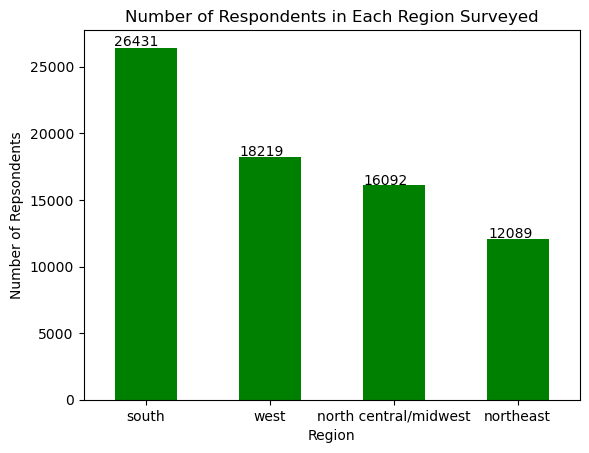

In [4]:
regionGraph_data = healthData['region'].value_counts()
# Create a bar chart
barplot = regionGraph_data.plot(kind='bar', color='green', edgecolor=None)

plt.xticks(rotation=0)
for p in barplot.patches:
    barplot.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Adding titles and labels
plt.title('Number of Respondents in Each Region Surveyed')
plt.xlabel('Region')
plt.ylabel('Number of Repsondents')

# Show the plot
plt.show()

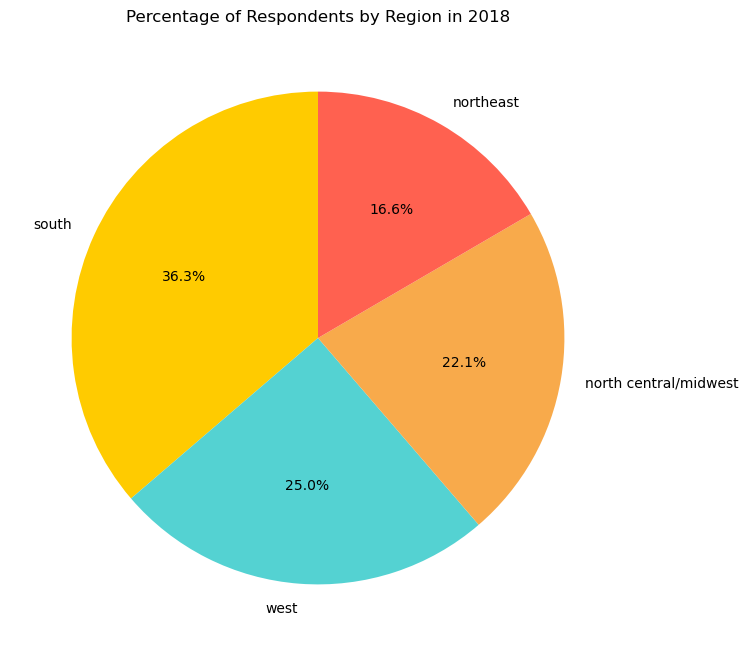

In [5]:
plt.figure(figsize=(8, 8))  # Optional: Specifies the figure size
plt.pie(regionGraph_data, labels=regionGraph_data.index, autopct='%1.1f%%', startangle=90, colors=['#ffcb00', '#54d2d2', '#f8aa4b', '#ff6150'])

# Adding a title
plt.title('Percentage of Respondents by Region in 2018')

# Show the plot
plt.show()

In [6]:
# a lot of this data is categorical so does it really matter?

display(pd.DataFrame(healthData[healthData['region'] == 'northeast'].describe()).round(0))
display(pd.DataFrame(healthData[healthData['region'] == 'south'].describe()).round(0))


,year,serial,strata,psu,hhweight,pernum,perweight,sampweight,fweight,age,occ
count,12089.000,12089.000,12089.000,12089.000,12089.000,12089.000,12089.000,12089.000,12089.000,12089.000,12089.000
mean,2018.000,23587.000,7122.000,49.000,4106.000,2.000,4623.000,4539.000,4304.000,41.000,14.000
std,0.000,13314.000,16.000,40.000,1633.000,1.000,1984.000,7049.000,1756.000,23.000,25.000
min,2018.000,7.000,7101.000,1.000,1025.000,1.000,0.000,0.000,972.000,0.000,0.000
25%,2018.000,12117.000,7110.000,5.000,3127.000,1.000,3405.000,0.000,3232.000,21.000,0.000
50%,2018.000,23871.000,7124.000,60.000,3860.000,2.000,4277.000,0.000,4017.000,42.000,0.000
75%,2018.000,35055.000,7140.000,65.000,4719.000,3.000,5415.000,7412.000,4959.000,61.000,16.000
max,2018.000,46477.000,7148.000,153.000,14110.000,13.000,20819.000,86624.000,18710.000,85.000,99.000


,year,serial,strata,psu,hhweight,pernum,perweight,sampweight,fweight,age,occ
count,26431.000,26431.000,26431.000,26431.000,26431.000,26431.000,26431.000,26431.000,26431.000,26431.000,26431.000
mean,2018.000,22799.000,7128.000,25.000,3993.000,2.000,4536.000,4545.000,4218.000,40.000,15.000
std,0.000,13564.000,16.000,17.000,1487.000,1.000,1849.000,6809.000,1631.000,23.000,26.000
min,2018.000,1.000,7102.000,1.000,941.000,1.000,0.000,0.000,893.000,0.000,0.000
25%,2018.000,11044.000,7115.000,9.000,3097.000,1.000,3385.000,0.000,3206.000,19.000,0.000
50%,2018.000,22501.000,7130.000,23.000,3587.000,2.000,4083.000,0.000,3781.000,40.000,0.000
75%,2018.000,34669.000,7141.000,39.000,4464.000,3.000,5237.000,7488.000,4814.000,59.000,21.000
max,2018.000,46498.000,7150.000,62.000,13821.000,12.000,18201.000,111788.000,18201.000,85.000,99.000


#### Looking further into the health categorical variables:

In [7]:
display(healthData.health.value_counts())
display(healthData.region.value_counts())
display(healthData.hinotcove.value_counts())

health
excellent             25109
very good             22683
good                  17432
fair                   5822
poor                   1711
unknown-refused          50
unknown-don't know       24
Name: count, dtype: int64

region
south                    26431
west                     18219
north central/midwest    16092
northeast                12089
Name: count, dtype: int64

hinotcove
no, has coverage        65706
yes, has no coverage     6378
unknown-don't know        747
Name: count, dtype: int64

#### Creating crosstabs based on regionS

In [8]:
region_health_table = pd.crosstab(healthData['region'], healthData['health'])
#print(region_health_table)
northeast_health_table = pd.crosstab(healthData[healthData['region'] == 'northeast']['health'], columns=['Number of Northeast Respondents'])
#display(northeast_health_table)
midwest_health_table = pd.crosstab(healthData[healthData['region'] == 'north central/midwest']['health'], columns='Number of North Central/Midwest Respondents')
#display(midwest_health_table)
west_health_table = pd.crosstab(healthData[healthData['region'] == 'west']['health'], columns='Number of West Respondents')
#display(west_health_table)
south_health_table = pd.crosstab(healthData[healthData['region'] == 'south']['health'], columns='Number of South Respondents')
#display(south_health_table)

region_insurance_table = pd.crosstab(index=[healthData['hinotcove']], columns=healthData['region'])
#display(region_insurance_table)
south_insurance_table = pd.crosstab(healthData[healthData['region'] == 'south']['hinotcove'], columns=['Number of South Respondents'])
#display(south_insurance_table)
# Narrow In On the South:
southHealthData = healthData[healthData['region'] == 'south']

south_MilitaryInsurance_table = pd.crosstab(index=southHealthData[southHealthData['himilva'] == 'mentioned']['himilva'],columns=southHealthData['region'])
south_Medicaid_table = pd.crosstab(index=southHealthData[southHealthData['himcaid'] == 'mentioned']['himcaid'], columns=southHealthData['region'])
south_Medicare_table = pd.crosstab(index=southHealthData[southHealthData['himcare'] == 'mentioned or yes']['himcare'], columns=southHealthData['region'])
south_Medigap_table = pd.crosstab(index=southHealthData[southHealthData['himedigap'] == 'mentioned']['himedigap'], columns=southHealthData['region']) 
south_OtherGovInsurance_table = pd.crosstab(index=southHealthData[southHealthData['hiothgov'] == 'mentioned']['hiothgov'], columns=southHealthData['region']) 

south_NoInsur_table = pd.crosstab(southHealthData[southHealthData['hinotcove'] == 'yes, has no coverage']['hinotcove'], southHealthData['region'])
# display(south_GovInsurance_table.value_counts())


display(south_MilitaryInsurance_table)
display(south_Medicaid_table)
display(south_Medigap_table)
display(south_OtherGovInsurance_table)
display(south_Medicare_table)

region,south
himilva,
mentioned,926


region,south
himcaid,
mentioned,3694


region,south
himedigap,
mentioned,218


region,south
hiothgov,
mentioned,389


region,south
himcare,
mentioned or yes,4852


#### Within the South, filtering for specific occupation groups:

In [9]:

def dummyCE_OCC(x):
    if x == 70: 
        return 'Construction trades workers'
    elif x == 4:
        return 'Other management occupations'
    elif x == 21:
        return 'Primary, secondary, and special education school teachers'
    elif x == 54:
        return 'Retail sales workers'
    else:
        return np.nan
    
southHealthData['ce_occ']=southHealthData["occ"].apply(dummyCE_OCC)
southHealthData[['occ','ce_occ']].head(10)

south_TopFourOcc = southHealthData[['occ', 'ce_occ']].value_counts(dropna=True)
print("Here are the four largest occupations of repondents in the south:")
display(south_TopFourOcc)

south_TopFourOcc_health = pd.crosstab(index=[southHealthData['ce_occ']], columns=[southHealthData['health']])
display(south_TopFourOcc_health)

south_TopFourOcc_Insur = pd.crosstab(index=[southHealthData['ce_occ']], columns=[southHealthData['hinotcove']])
display(south_TopFourOcc_Insur)

south_TopFourOcc_Medicare = pd.crosstab(index=[southHealthData['ce_occ']], 
                                        columns=[southHealthData['himcare']])
#print('Note that Medicare controls for Age, only people 65 or older qualify. ')
#display(south_TopFourOcc_Medicare)

south_TopFourOcc_MilInsur = pd.crosstab(index=[southHealthData['ce_occ']], columns=[southHealthData['himilva']])
display(south_TopFourOcc_MilInsur)
south_TopFourOcc_VaInsur = pd.crosstab(index=[southHealthData['ce_occ']], columns=[southHealthData['hiva']])
display(south_TopFourOcc_VaInsur)
south_topFourOcc_DietAge = pd.crosstab(index=[southHealthData['ce_occ']], columns=southHealthData['diabeticage'])

southHealthData_hasMedicaid = southHealthData[southHealthData['himcaid'] == 'mentioned']
southHealthData_hasOthGovInsur = southHealthData[southHealthData['hiothgov'] == 'mentioned']
southHealthData_hasNoInsur = southHealthData[southHealthData['hinone'] == 'mentioned']
# display(southHealthData_hasMedicaid)

south_topFourOcc_Medicaid = pd.crosstab(index=[southHealthData_hasMedicaid['ce_occ']], columns=[southHealthData_hasMedicaid['health']])
south_topFourOcc_OtherGovInsur = pd.crosstab(index=[southHealthData_hasOthGovInsur['ce_occ']], columns=[southHealthData_hasOthGovInsur['health']])
south_topFourOcc_NoInsur = pd.crosstab(index=southHealthData_hasNoInsur['ce_occ'], columns=southHealthData_hasNoInsur['health'])


south_TopFourOcc_hasMedicare = south_TopFourOcc_Medicare['mentioned or yes']
south_TopFourOcc_NoInsur = south_TopFourOcc_Insur['yes, has no coverage']


Here are the four largest occupations of repondents in the south:


/var/folders/7k/7hqtt0l56y3dqfql4pb9y3jr0000gn/T/ipykernel_84409/3969455536.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  southHealthData['ce_occ']=southHealthData["occ"].apply(dummyCE_OCC)


occ  ce_occ                                                   
4    Other management occupations                                 483
21   Primary, secondary, and special education school teachers    401
70   Construction trades workers                                  362
54   Retail sales workers                                         358
Name: count, dtype: int64

health,excellent,very good,good,fair,poor
ce_occ,,,,,
Construction trades workers,73,83,125,64,17
Other management occupations,128,173,128,41,13
"Primary, secondary, and special education school teachers",103,135,125,35,3
Retail sales workers,90,99,97,59,13


hinotcove,"no, has coverage","yes, has no coverage",unknown-don't know
ce_occ,,,
Construction trades workers,242,118,2
Other management occupations,434,48,1
"Primary, secondary, and special education school teachers",382,18,1
Retail sales workers,288,70,0


himilva,niu,not mentioned,mentioned
ce_occ,,,
Construction trades workers,334,2,26
Other management occupations,446,11,26
"Primary, secondary, and special education school teachers",380,17,4
Retail sales workers,326,19,13


hiva,niu,not mentioned,mentioned
ce_occ,,,
Construction trades workers,342,5,15
Other management occupations,455,13,15
"Primary, secondary, and special education school teachers",382,18,1
Retail sales workers,332,18,8


##### Create Bins and Manage Data Concerning Diatbetes Age:

In [10]:
def map_diabetic_age(df, mapping_dict):
    if 'diabeticage' not in df.columns:
        raise ValueError("Column 'diabeticage' does not exist in the DataFrame.")
    df['diabetic_age_int'] = df['diabeticage'].map(mapping_dict)
    df['diabetic_age_int'].fillna(np.nan, inplace=True)    
    return df

mapping_dict = {f"{i} year" if i == 1 else f"{i} years": i for i in range(1, 81)}

southHealthData_withDiabeticAgeInt = map_diabetic_age(southHealthData, mapping_dict)
#display(southHealthData_withDiabeticAgeInt['ce_occ'].value_counts())# define cut points for the rank:
#display(southHealthData_withDiabeticAgeInt.info())

southHealthDataDiabeticAge_hasMedicaid = southHealthData_withDiabeticAgeInt[southHealthData_withDiabeticAgeInt['himcaid'] == 'mentioned']
# display(southHealthDataDiabeticAge_hasMedicaid['diabetic age int'].value_counts())
south_topFourOcc_MedicaidDiabeticAge = pd.crosstab(index=[southHealthData_withDiabeticAgeInt['ce_occ']], columns=[southHealthData_withDiabeticAgeInt['diabetic_age_int']])
#display(south_topFourOcc_MedicaidDiabeticAge.info())


age_bins = [20, 30, 40, 50, 60, 70, 80, 84, 85]

# create categorical variable containing ranges for the rank:
southHealthData_withDiabeticAgeInt['diabetic age bins'] = pd.cut(southHealthData_withDiabeticAgeInt['diabetic_age_int'], bins=age_bins, 
                       labels=['Under 20', '(20,30]', '(30,40]',
                                '(40,50]', '(50,60]', '(60,70]', '(70,80]', '80 and older'])

# display frequencies:
freq = pd.crosstab(southHealthData_withDiabeticAgeInt['diabetic age bins'], columns='count')
freq

southHealthData_withDiabeticAgeInt_Medicaid = southHealthData_withDiabeticAgeInt[southHealthData_withDiabeticAgeInt['himcaid'] == 'mentioned']
southHealthData_withDiabeticAgeInt_Medicare = southHealthData_withDiabeticAgeInt[southHealthData_withDiabeticAgeInt['himcare'] == 'mentioned or yes']
southHealthData_withDiabeticAgeInt_OthGovInsur = southHealthData_withDiabeticAgeInt[southHealthData_withDiabeticAgeInt['hiothgov'] == 'mentioned']

southHealthData_withDiabeticAgeInt_WorkInsur = southHealthData_withDiabeticAgeInt[southHealthData_withDiabeticAgeInt['hiatwork'] == 'yes']


south_topFourOcc_DiabeticAgeBins = pd.crosstab(index=[southHealthData_withDiabeticAgeInt['diabetic age bins']], columns=[southHealthData_withDiabeticAgeInt['ce_occ']])

south_topFourOcc_DiabeticAgeBins_Medicaid = pd.crosstab(index=[southHealthData_withDiabeticAgeInt_Medicaid['diabetic age bins']], columns=[southHealthData_withDiabeticAgeInt_Medicaid['ce_occ']])
south_topFourOcc_DiabeticAgeBins_Medicare = pd.crosstab(index=[southHealthData_withDiabeticAgeInt_Medicare['diabetic age bins']], columns=[southHealthData_withDiabeticAgeInt_Medicare['ce_occ']])
south_topFourOcc_DiabeticAgeBins_OthGovInsur = pd.crosstab(index=[southHealthData_withDiabeticAgeInt_OthGovInsur['diabetic age bins']], columns=[southHealthData_withDiabeticAgeInt_OthGovInsur['ce_occ']])

south_topFourOcc_DiabeticAgeBins_WorkInsur = pd.crosstab(index=[southHealthData_withDiabeticAgeInt_WorkInsur['diabetic age bins']], columns=[southHealthData_withDiabeticAgeInt_WorkInsur['ce_occ']])

display(south_topFourOcc_DiabeticAgeBins)


same_values = southHealthData_withDiabeticAgeInt['himedigap'] == southHealthData_withDiabeticAgeInt['himcaid']

# Check if there's any True in the series
any_same_values = same_values.any()
print(f"Rows with the same value: {any_same_values}.")

/var/folders/7k/7hqtt0l56y3dqfql4pb9y3jr0000gn/T/ipykernel_84409/1336483291.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diabetic_age_int'] = df['diabeticage'].map(mapping_dict)
/var/folders/7k/7hqtt0l56y3dqfql4pb9y3jr0000gn/T/ipykernel_84409/1336483291.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diabetic_age_int'].fillna(np.nan, inplace=True)
/var/folders/7k/7hqtt0l56y3dqfql4pb9y3jr0000gn/T/ipykernel_84409/1336483291.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

ce_occ,Construction trades workers,Other management occupations,"Primary, secondary, and special education school teachers",Retail sales workers
diabetic age bins,,,,
Under 20,2,2,4,4
"(20,30]",7,7,9,6
"(30,40]",10,10,8,11
"(40,50]",8,15,15,6
"(50,60]",9,9,6,3
"(60,70]",2,3,5,4


Rows with the same value: True.


#### represent this data with a barchart


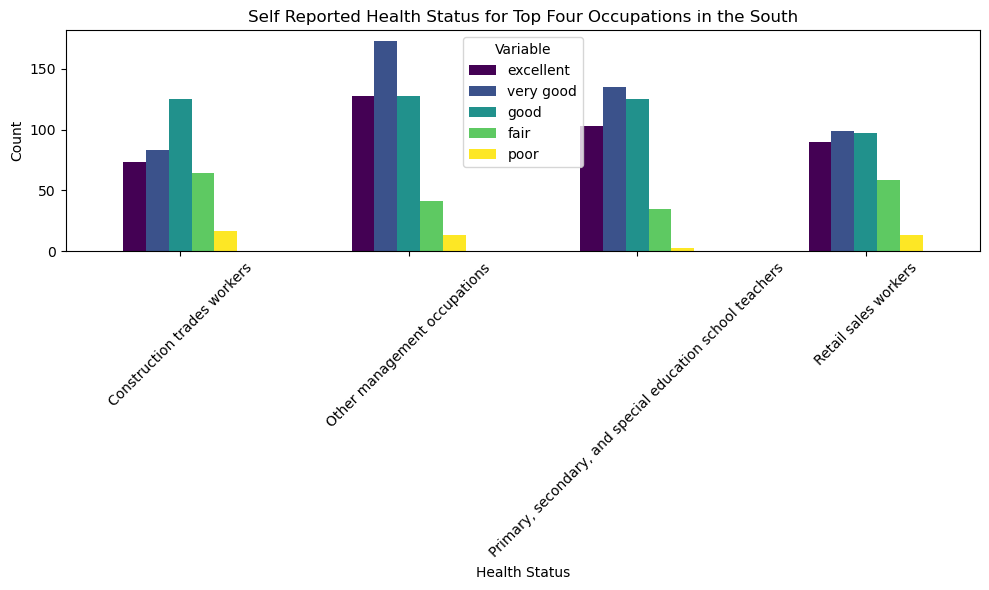

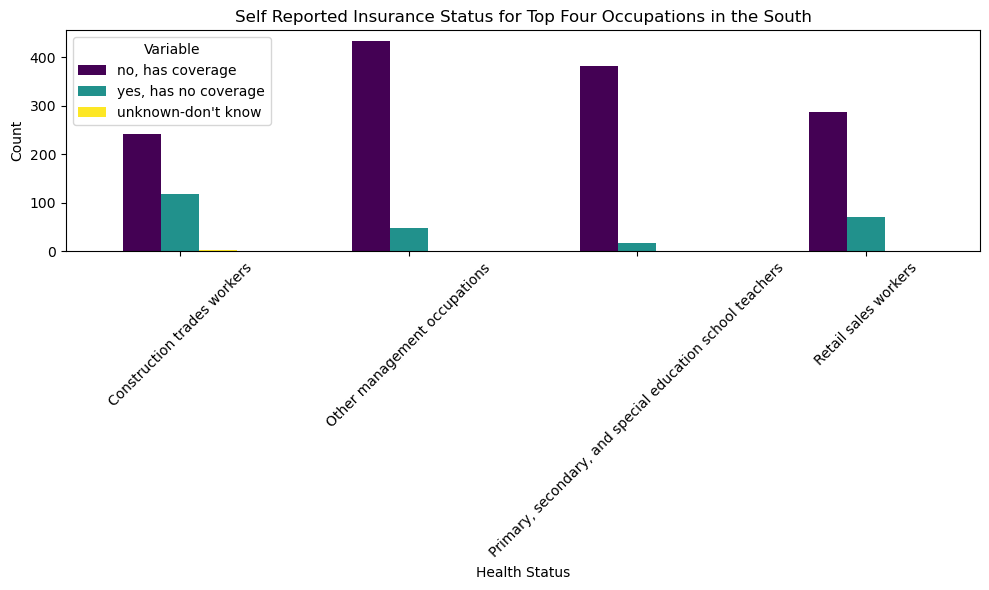

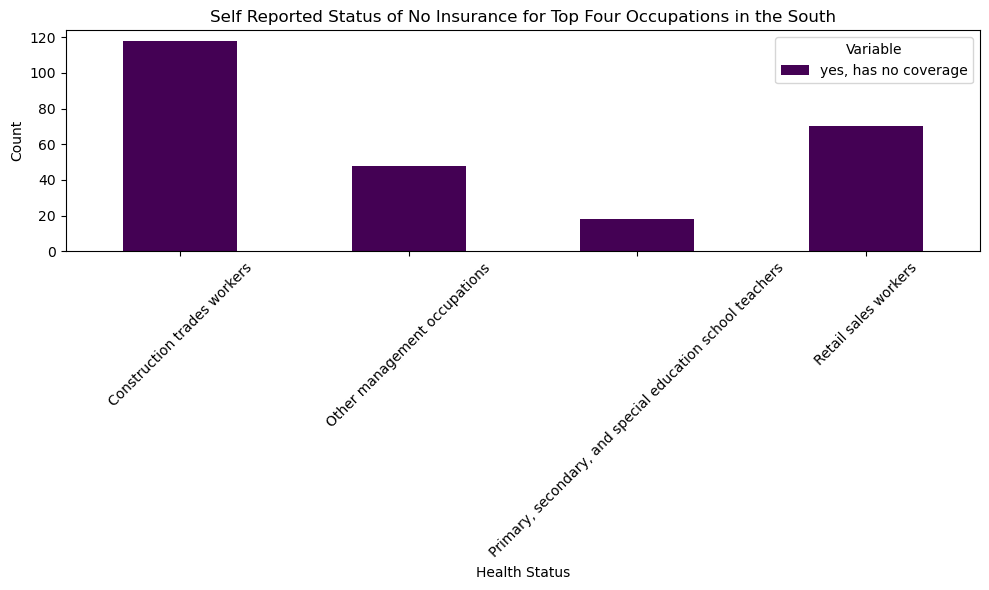

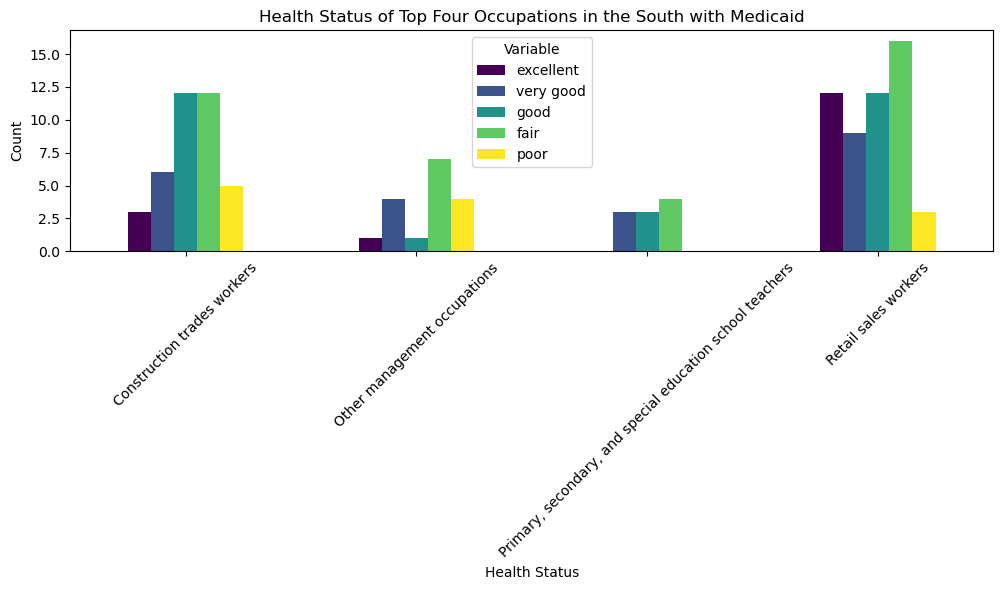

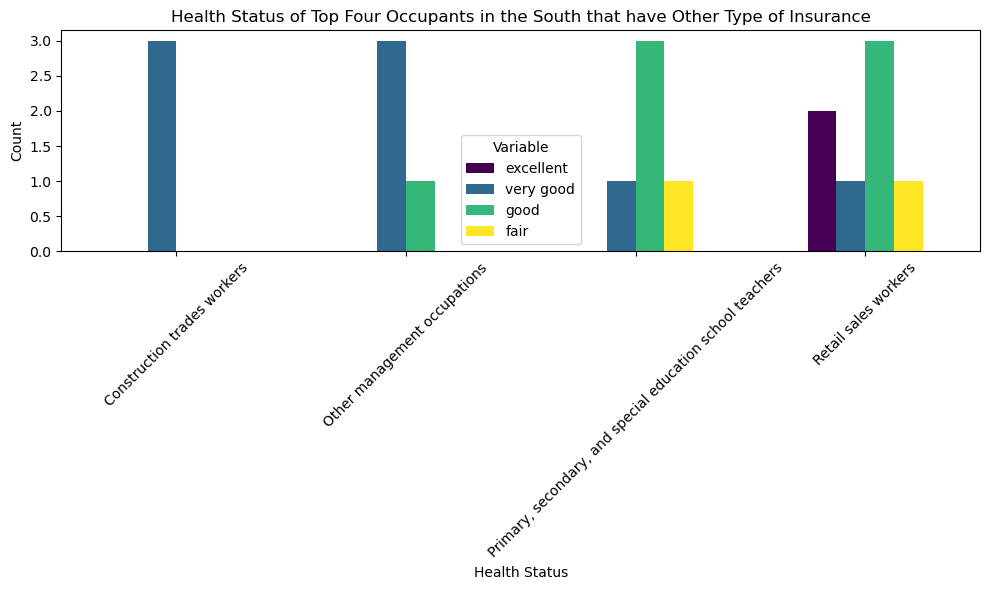

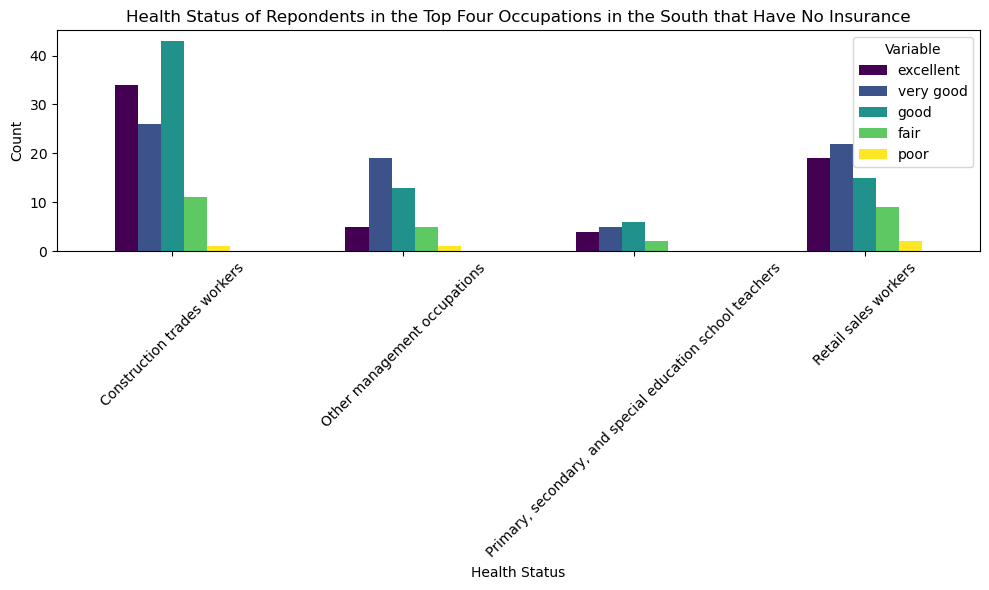

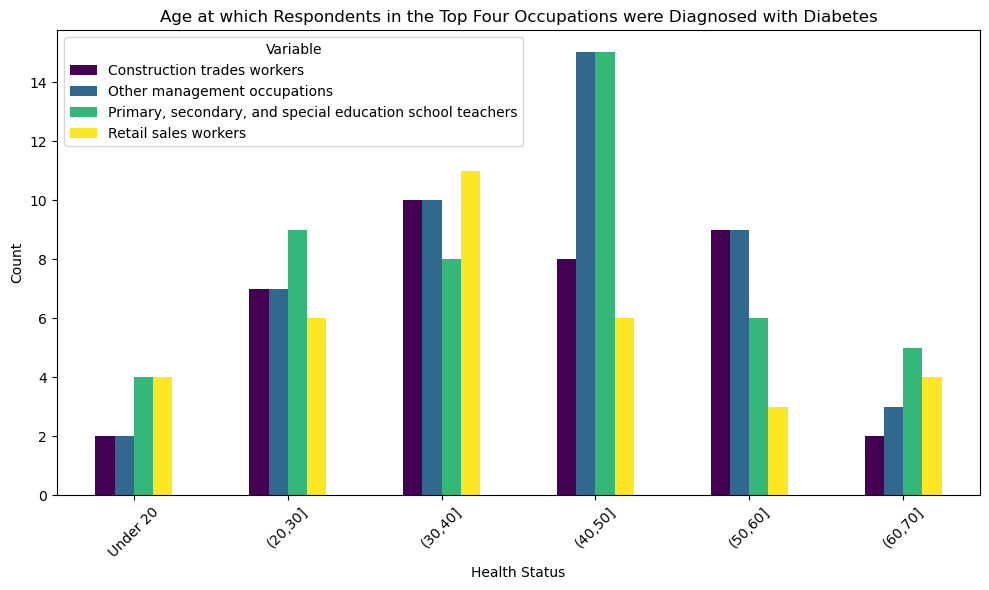

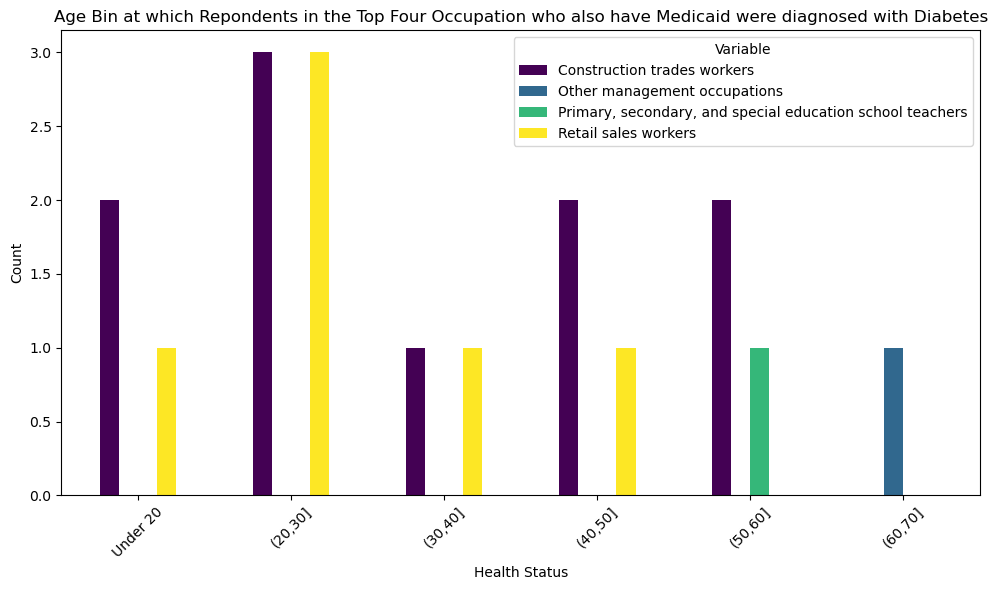

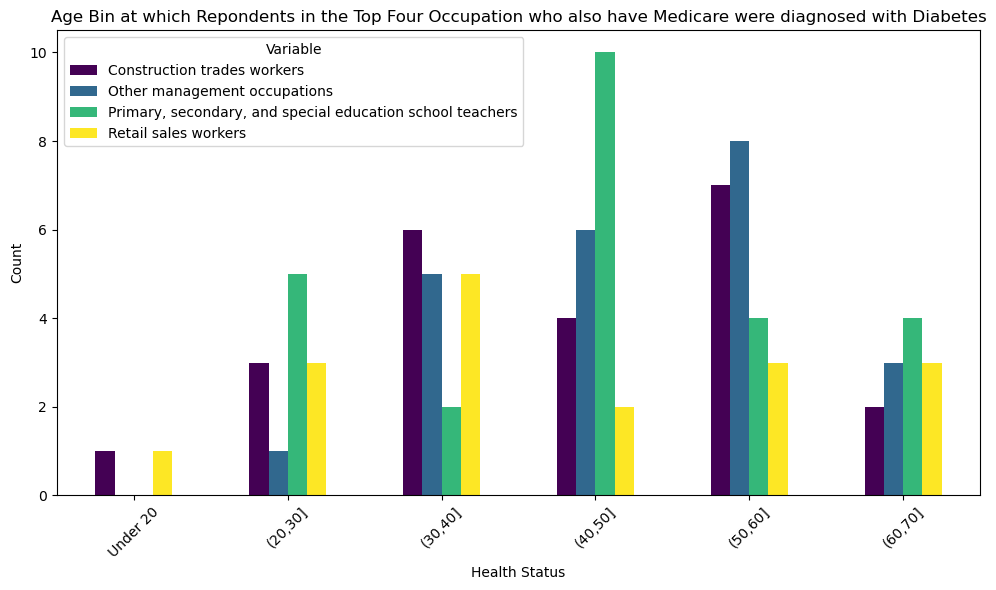

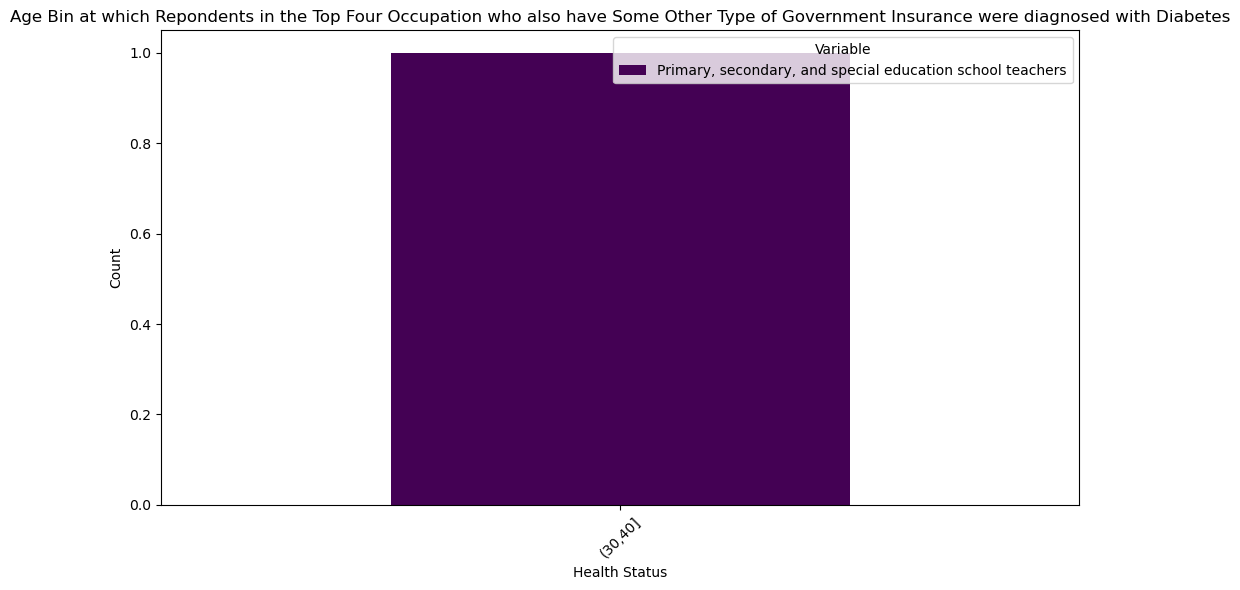

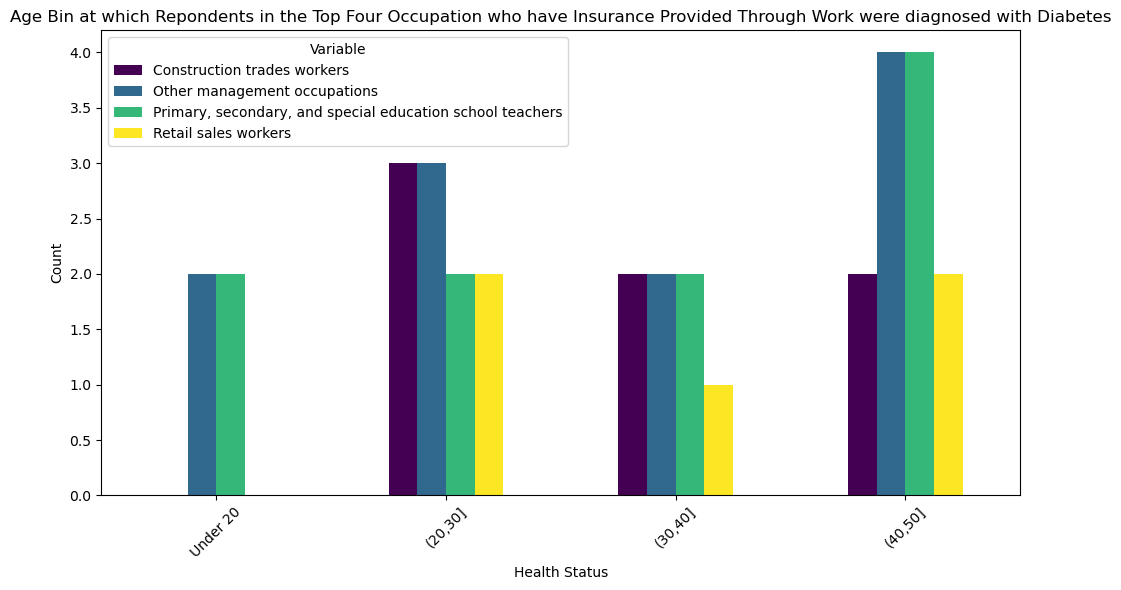

In [11]:
def make_barChart(cross_tab, plot_title):
    ax = cross_tab.plot(kind='bar', figsize=(10, 6), colormap='viridis')
    plt.xlabel('Health Status')  
    plt.ylabel('Count')
    plt.title(f'{plot_title}')
    plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility
    plt.legend(title='Variable')  # Adjust legend title as needed
    plt.tight_layout()  
    plt.show()


make_barChart(south_TopFourOcc_health, 'Self Reported Health Status for Top Four Occupations in the South')
make_barChart(south_TopFourOcc_Insur, 'Self Reported Insurance Status for Top Four Occupations in the South')
make_barChart(south_TopFourOcc_NoInsur, "Self Reported Status of No Insurance for Top Four Occupations in the South")
make_barChart(south_topFourOcc_Medicaid, 'Health Status of Top Four Occupations in the South with Medicaid')
make_barChart(south_topFourOcc_OtherGovInsur, 'Health Status of Top Four Occupants in the South that have Other Type of Insurance')
make_barChart(south_topFourOcc_NoInsur, 'Health Status of Repondents in the Top Four Occupations in the South that Have No Insurance')

make_barChart(south_topFourOcc_DiabeticAgeBins, 'Age at which Respondents in the Top Four Occupations were Diagnosed with Diabetes')

make_barChart(south_topFourOcc_DiabeticAgeBins_Medicaid, 'Age Bin at which Repondents in the Top Four Occupation who also have Medicaid were diagnosed with Diabetes')
make_barChart(south_topFourOcc_DiabeticAgeBins_Medicare, 'Age Bin at which Repondents in the Top Four Occupation who also have Medicare were diagnosed with Diabetes')
make_barChart(south_topFourOcc_DiabeticAgeBins_OthGovInsur, 'Age Bin at which Repondents in the Top Four Occupation who also have Some Other Type of Government Insurance were diagnosed with Diabetes')
make_barChart(south_topFourOcc_DiabeticAgeBins_WorkInsur, 'Age Bin at which Repondents in the Top Four Occupation who have Insurance Provided Through Work were diagnosed with Diabetes')

#make_barChart(northeast_health_table, 'Northeast')
#make_barChart(south_health_table, 'South')
#make_barChart(midwest_health_table, 'Central/Mid-West')
#make_barChart(west_health_table, 'West')
#make_barChart(region_insurance_table, 'Region Insurance Coverage')
#make_barChart([south_Medicaid_table, south_Medigap_table, south_Medicare_table, south_MilitaryInsurance_table, south_OtherGovInsurance_table],
#    ['Medicaid', 'Medigap', 'Medicare', 'Military Insurance', 'Other Government Insurance'])
#make_barChart2(
#    [south_Medicaid_table, south_Medigap_table, south_Medicare_table, south_MilitaryInsurance_table, south_OtherGovInsurance_table],
#    ['Medicaid', 'Medigap', 'Medicare', 'Military Insurance', 'Other Government Insurance']
#    )

#### Running a regression against diabetes int:

In [23]:
# southHealthData_withDiabeticAgeInt.info()
diabeteicAgeInt_regression = smf.ols(formula='diabetic_age_int ~ age + C(himcaid)', data=southHealthData_withDiabeticAgeInt.dropna()).fit()
# display(diabeteicAgeInt_regression.summary())
st = Stargazer([diabeteicAgeInt_regression])
HTML(st.render_html())


#### Calculate VIF:

,variables,VIF
0,diabetic_age_int,1.587
1,age,1.587
2,Intercept,21.980


/var/folders/7k/7hqtt0l56y3dqfql4pb9y3jr0000gn/T/ipykernel_84409/3316237241.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, fit=norm);
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


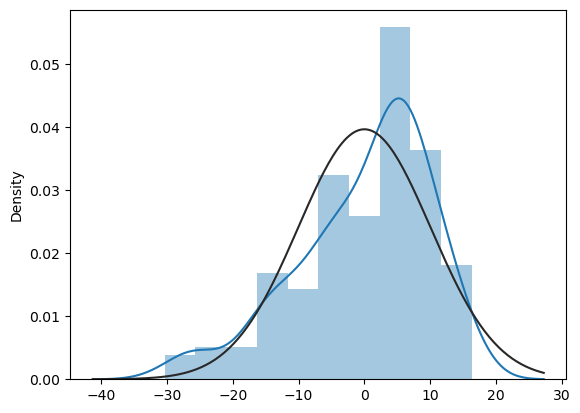

In [24]:
# calculate VIF :
# two [] to be able create a DataFrame
X = southHealthData_withDiabeticAgeInt[['diabetic_age_int', 'age']].dropna().copy()
X['Intercept'] = 1
vif = pd.DataFrame()
vif['variables'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# View results using print
display(vif)

rmse = np.sqrt(np.sum((diabeteicAgeInt_regression.mse_resid)**2)/(len(diabeteicAgeInt_regression.resid)-4))
rmse1 = np.sqrt(diabeteicAgeInt_regression.mse_resid)

from scipy.stats import norm

x_axis = np.arange(-2, 2, 0.001)
# Mean = 0, SD = 2.


res=pd.DataFrame(diabeteicAgeInt_regression.resid)
sns.distplot(res, fit=norm);



Creating a numerical catergorical variable for health status. Following the numbers in the IPUMS codebook. 

In [13]:
# create a numerical variable for health status for the regression. 
def dummyHealth(x):
    if x == 'excellent':
        return 1
    elif x == 'very good': 
        return 2
    elif x == 'good': 
        return 3
    elif x == 'fair': 
        return 4
    elif x == 'poor': 
        return 5
    else:
        return np.nan
    
southHealthData['num_health']=southHealthData["health"].apply(dummyHealth)
southHealthData[['health','num_health']].head(10)   
southHealthData[['health', 'num_health']].value_counts(dropna=False)

south_TopFourOcc_NumHealth = pd.crosstab(index=[southHealthData['ce_occ']], columns=[southHealthData['num_health']])
display(south_TopFourOcc_NumHealth)




/var/folders/7k/7hqtt0l56y3dqfql4pb9y3jr0000gn/T/ipykernel_84409/3025803440.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  southHealthData['num_health']=southHealthData["health"].apply(dummyHealth)


num_health,1.000,2.000,3.000,4.000,5.000
ce_occ,,,,,
Construction trades workers,73,83,125,64,17
Other management occupations,128,173,128,41,13
"Primary, secondary, and special education school teachers",103,135,125,35,3
Retail sales workers,90,99,97,59,13


#### Idea: What if we get really specific -> Narrow down to just one region of the United States.
#### We can choose the south because it is the largest sub-population of data (proven by the pie chart) and we're in the south.
#### Can then isolate the different insurance variables to that region.
#### Get even more specific -> Can we focus on one insurance type? Would we still get full grade for this?
#### If we want to specify by occupation code here is the dictionary:
##### https://nhis.ipums.org/nhis/10occ.shtml

### BIG ISSUE: A lot of these Insurance Programs are not mutually exclussive. Something to think about in the Regression? Focus on just one government health insurance plan, then regress it on the Diabetes_int column? Similiar to the law school example we did in class in Qual2 file?